<font color = Blue> **Lending Club Case Study** <br>
<font color = Black> _EPGPML-C49_ <br>
<font color = #AA59E2> __Ankush Garg & Pulkit Gangwar__ <br>

### Data Reading and Cleaning

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
# Reading Files
loan = pd.read_csv("loan.csv", low_memory = False)

Col_dict = pd.read_excel("Data_Dictionary.xlsx")

# Printing Shape of file
print(f"Shape of the DataFrame is  - {loan.shape}")
loan.head()

Shape of the DataFrame is  - (39717, 111)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
# Finding mean NAN values in all columns and columns which needs to be removed

col_list = loan.columns
nan_values = []
i = 0
e = 0
for x in col_list:
    nan_values.append(loan[x].isnull().mean()*100)     # Making a list of mean NAN values in all columns
    
for x in nan_values:                                   # Finding No. of columns which needs to be removed
    if x == 100.0:
        i += 1
    elif x > 30.0:
        e  += 1
        
print(f"""
Total columns which have 100% NAN values are - {i}       
Total columns which have more than 30% and less than 100% NAN values are - {e}
Total Columns which needs to be removed are - {e+i}
""")
# print(nan_values)


Total columns which have 100% NAN values are - 54       
Total columns which have more than 30% and less than 100% NAN values are - 4
Total Columns which needs to be removed are - 58



In [15]:
# Dropping Columns which have more than 30% NAN Values

for x in col_list:
    if loan[x].isnull().mean()*100 > 30.0 :
        loan.drop([x], axis =1, inplace = True)
        
print(f"Shape of DataFrame after dropping columns is - {loan.shape}")             # Checking Shape of DataFrame after removing Columns                                   

Shape of DataFrame after dropping columns is - (39717, 53)


In [5]:
# Analysing NAN Values in rest of the columns

col_list2= loan.columns
for x in col_list2:
    y = loan[x].isnull().mean()*100
    if y > 0.0:
        print(f"Nan Values in '{x}' is  -->          {y.round(2)} %")

Nan Values in 'emp_title' is  -->          6.19 %
Nan Values in 'emp_length' is  -->          2.71 %
Nan Values in 'title' is  -->          0.03 %
Nan Values in 'revol_util' is  -->          0.13 %
Nan Values in 'last_pymnt_d' is  -->          0.18 %
Nan Values in 'last_credit_pull_d' is  -->          0.01 %
Nan Values in 'collections_12_mths_ex_med' is  -->          0.14 %
Nan Values in 'chargeoff_within_12_mths' is  -->          0.14 %
Nan Values in 'pub_rec_bankruptcies' is  -->          1.75 %
Nan Values in 'tax_liens' is  -->          0.1 %


In [6]:
# Removing Redundant variables where Imputation can not be done

loan.drop(["emp_title", "id", "tax_liens", "member_id", "url", "title", "zip_code", "initial_list_status", "collections_12_mths_ex_med", "policy_code", "acc_now_delinq", "chargeoff_within_12_mths", "delinq_amnt", "pymnt_plan", "out_prncp", "out_prncp_inv", "application_type"], axis = 1, inplace = True)
print(loan.shape)
loan.head()


(39717, 36)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


In [7]:
# Removing rows which have NAN values

loan.dropna(axis = 0, inplace = True)
loan.shape

(37835, 36)

In [8]:
# Removing status = "Current" From Loan status column
a = 0
loan.drop(loan[loan['loan_status'] == "Current"].index, inplace = True)
loan.shape


(36737, 36)

### Univariant Analysis

In [9]:
loan.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

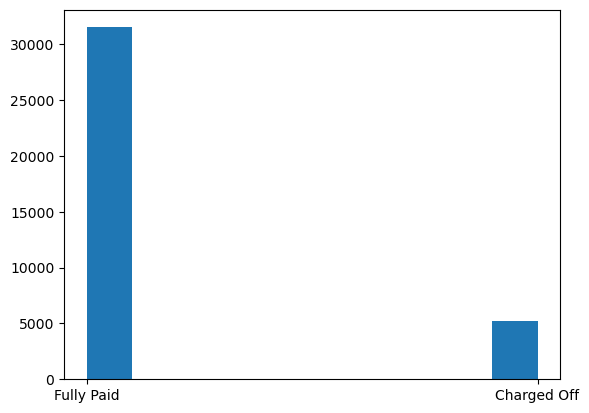

In [10]:
plt.hist(loan.loan_status)
plt.show()

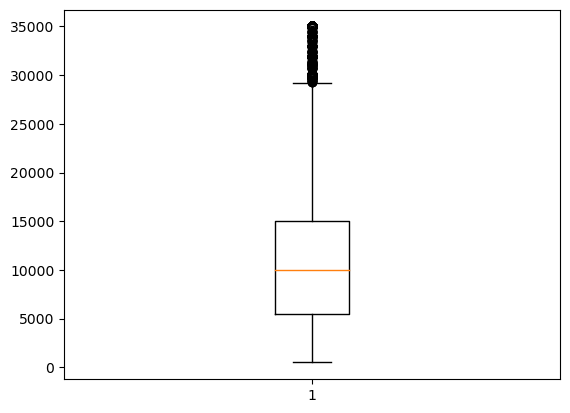

In [11]:
plt.boxplot([loan.loan_amnt])
plt.show()

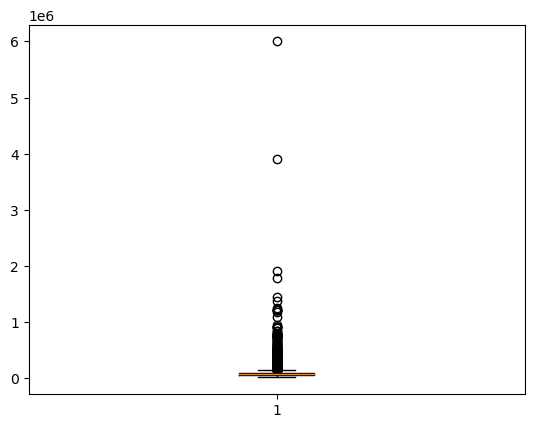

In [12]:
plt.boxplot([loan.annual_inc])
plt.show()